<a href="https://colab.research.google.com/github/Theveetha/Python_Titanic_EDA/blob/main/Titanic_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Titanic Data - EDA Case Study***

## Import Warnings

In [148]:
import warnings
warnings.filterwarnings('ignore')

## Import required libraries

In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Mount drive

In [150]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import and Read the dataset

In [151]:
# file_path = file_path = r'T:\Learning\LearnBay_DataScience\Statistics and ML\Class17_CaseStudy\Titanic\titanic.csv'
file_path = '/content/drive/MyDrive/Stats_Dataset/titanic.csv'
data = pd.read_csv(file_path)

# To display maximum rows and columns
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

## Basic info on the dataframe

### Data Information

In [152]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Number of Rows and Columns

In [153]:
rows, columns = data.shape
print(f"Number of Rows : {rows}\nNumber of Columns : {columns}")

Number of Rows : 891
Number of Columns : 12


### Number of Features

In [154]:
# Using for loop for taking the count of numerical and categorical values
num, obj = 0, 0
for feature in data.columns:
  if data.dtypes[feature] != 'O':
    num += 1
  else:
    obj += 1

print(f"Number of Numerical columns : {obj}\nNumber of Categorical columns : {num}")

Number of Numerical columns : 5
Number of Categorical columns : 7


### Unique Column details

In [155]:
# Using for loop for the count of columns having single unique values
s_cunique, n_cunique = 0,0
# Categorical Column
for feature in data:
  if data[feature].dtype == 'O':
    if len(data[feature].unique()) == 1:
      s_cunique += 1
    else:
      n_cunique += 1

print("Categorical columns :")
print(f"# of columns having one unique value : {s_cunique} ")
print(f"# of columns having more than one unique value : {n_cunique}")

print()

s_nunique, n_nunique = 0,0
# Numerical Column
for feature in data:
  if data[feature].dtype != 'O':
    if len(data[feature].unique()) == 1:
      s_nunique += 1
    else:
      n_nunique += 1

print("Numerical columns :")
print(f"# of columns having one unique value : {s_nunique} ")
print(f"# of columns having more than one unique value : {n_nunique}")

Categorical columns :
# of columns having one unique value : 0 
# of columns having more than one unique value : 5

Numerical columns :
# of columns having one unique value : 0 
# of columns having more than one unique value : 7


### Column Name and its data type

In [156]:
# List of column names and its data type
column_names = data.columns.tolist()
column_dtypes = [str(dtype) for dtype in data.dtypes.tolist()]
column_unique = [len(data[name].unique()) for name in data.columns]

# Store them in a dictionary
column_info = {'Column_Name': column_names, 'Data_Type': column_dtypes, 'Unique_Count' : column_unique}

# Create a Dataframe for the same
df_column_info = pd.DataFrame(column_info,index=range(1,len(column_names)+1))

df_column_info

,Column_Name,Data_Type,Unique_Count
1,PassengerId,int64,891
2,Survived,int64,2
3,Pclass,int64,3
4,Name,object,891
5,Sex,object,2
6,Age,float64,89
7,SibSp,int64,7
8,Parch,int64,7
9,Ticket,object,681
10,Fare,float64,248


### Description on Column names

* PassengerId - This column has complete unique values
* Survived - Indicates whether the passenger Survived (1) or not (0)
* Pclass - Indicates the passengers ticket class
  * 1 - First Class
  * 2 - Second Class
  * 3 - Third Class
* Name - Name of the passenger
* Sex - Gender of the passenger (male or female)
* Age - Age of the passenger
* SibSp - Provides the count of Siblings or Spouses to the passenger
* Parch - Provides the count of Children to the passenger
* Ticket - Ticket number issued to the passenger
* Fare - Fare paid by the passenger for the ticket
* Cabin - Indicates which cabin the passenger belongs to
* Embarked - Place from where the passenger boarder Titanic
  * C - Cherbourg
  * Q - Queenstown
  * S - Southampton

### Observation

* There are no columns with one unique value
* All the values present in the PassengerId is unique - We can remove this column
* Based on the description we can see that Ticket and Name columns is not required for our analysis - We can remove this column

## Data Cleaning

### Data Duplicates

In [157]:
count = data[data.duplicated()].shape
print(f"There are no duplicates in the dataset" if count[0]==0 else f"There are {count[0]} duplicates in the dataset")

There are no duplicates in the dataset


### Null Value Columns

In [158]:
# % of missing values in each columns
mv_gtr_30 = []
mv_lsr_30 = []
n_mv = []
for cols in data:
  if (data[cols].isnull().mean()*100) >= 30:
    mv_gtr_30.append(cols)
  elif 0 < (data[cols].isnull().mean()*100) < 30:
    mv_lsr_30.append(cols)
  else:
    n_mv.append(cols)

print(f"Number of columns having missing value >= 30% : {len(mv_gtr_30)}")
print(f"Number of columns having missing value < 30% : {len(mv_lsr_30)}")
print(f"Number of columns having missing value = 0% : {len(n_mv)}")

Number of columns having missing value >= 30% : 1
Number of columns having missing value < 30% : 2
Number of columns having missing value = 0% : 9


### Observation

* There are no Duplicate records in the given dataframe
* We have one column which has null value greater than 30% (Cabin) - We can remove this column
* We have two columns which has null value less than 30% (Age, Embarked) - We have to fill the null values in these columns

## Modifications based on our Observation till Data Cleaning

### Removal of few columns

In [159]:
des_removal = ['PassengerId','Name','Ticket']

# Merging the list of columns to remove
from itertools import chain

remove_cols = list(chain(mv_gtr_30,des_removal))

print(f"Total number of columns : {data.shape[1]}")
print(f"Total number of columns to remove : {len(remove_cols)}")

data.drop(columns=remove_cols,inplace=True)

print(f"Total number of columns post cleanup : {data.shape[1]}")

Total number of columns : 12
Total number of columns to remove : 4
Total number of columns post cleanup : 8


### Dataframe information post Data Cleaning

In [161]:
# List of column names, its data type and its missing percentage
column_names = data.columns.tolist()
column_dtypes = [str(dtype) for dtype in data.dtypes.tolist()]
column_unique = [len(data[name].unique()) for name in data.columns]
column_mv = [data[name].isnull().mean()*100 for name in data.columns]

# Store them in a dictionary
column_info = {'Column_Name': column_names,
               'Data_Type': column_dtypes,
               'Unique_Value': column_unique,
               'Missing_Percentage' : column_mv}

# Create a Dataframe for the same
df_column_info = pd.DataFrame(column_info,index=range(1,len(column_names)+1))

df_column_info

,Column_Name,Data_Type,Unique_Value,Missing_Percentage
1,Survived,int64,2,0.000000
2,Pclass,int64,3,0.000000
3,Sex,object,2,0.000000
4,Age,float64,89,19.865320
5,SibSp,int64,7,0.000000
6,Parch,int64,7,0.000000
7,Fare,float64,248,0.000000
8,Embarked,object,4,0.224467


## Data Transformation

### Data Type Casting

In [ ]:
# Looking at the datatypes for the available columns we can see that Age should be an integer. Rather its a float. So have to typecast it to integer

### Missing Value Analysis

In [182]:
# Details to understand numerical column's missing value
data[mv_lsr_30].describe()

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


In [176]:
# Details to understand numerical column's categorical value
for col in data[mv_lsr_30]:
  if data[col].dtype == 'O':
    print(f"Mode of Categorical column - {col} is {data[col].mode()[0]}")

Mode of Categorical column - Embarked is S


### Observation

* Age should be an integer type column. So convert from float to int
* We can see that the mean and median for the Age column is approximately equal so we can replace with either mean or meadian
* For the categorical column we have to replace the missing value with mode, also we see that this particular column has int value. So replace that also with mode
* Also for the values in Embarked we can give proper place name

## Modification based on our Observation till Data Manipulation

### Handling missing value for numerical column

In [200]:
data.fillna(data['Age'].median(),inplace=True)
print(f"Count of Null Value in 'Age' : {data['Age'].isnull().sum()}")

Count of Null Value in 'Age' : 0


### Handling missing value for categorical column

In [213]:
# Handling null value
data.fillna(data['Embarked'].mode(),inplace = True)
print(f"Count of Null Value in 'Embarked' : {data['Embarked'].isnull().sum()}")

# Changing the wrong value
print(f"Unique values of Embarked : {data['Embarked'].unique()}")
data['Embarked'] = data['Embarked'].replace(28.0,data['Embarked'].mode()[0])
print(f"Unique values of Embarked post update : {data['Embarked'].unique()}")

Count of Null Value in 'Embarked' : 0
Unique values of Embarked : ['S' 'C' 'Q']
Unique values of Embarked post update : ['S' 'C' 'Q']


### Data type conversion

In [209]:
print(f"Age Datatype before conversion : {data['Age'].dtype}")
data['Age'] = data['Age'].astype('int')
print(f"Age Datatype after conversion : {data['Age'].dtype}")

Age Datatype before conversion : float64
Age Datatype after conversion : int64


### Replace Embarked values with proper place name

In [214]:
map = {'S': 'Southampton', 'C': 'Cherbourg', 'Q': 'Queenstown'}
data['Embarked'] = data['Embarked'].map(map)
print(f"Unique values of Embarked post update : {data['Embarked'].unique()}")

Unique values of Embarked post update : ['Southampton' 'Cherbourg' 'Queenstown']


### Dataframe information post Data Transformation

In [215]:
# List of column names, its data type and its missing percentage
column_names = data.columns.tolist()
column_dtypes = [str(dtype) for dtype in data.dtypes.tolist()]
column_unique = [len(data[name].unique()) for name in data.columns]
column_mv = [data[name].isnull().mean()*100 for name in data.columns]

# Store them in a dictionary
column_info = {'Column_Name': column_names,
               'Data_Type': column_dtypes,
               'Unique_Value': column_unique,
               'Missing_Percentage' : column_mv}

# Create a Dataframe for the same
df_column_info = pd.DataFrame(column_info,index=range(1,len(column_names)+1))

df_column_info

,Column_Name,Data_Type,Unique_Value,Missing_Percentage
1,Survived,int64,2,0.0
2,Pclass,int64,3,0.0
3,Sex,object,2,0.0
4,Age,int64,71,0.0
5,SibSp,int64,7,0.0
6,Parch,int64,7,0.0
7,Fare,float64,248,0.0
8,Embarked,object,3,0.0


## Analysis

### Univariate Analysis

Ignore Below

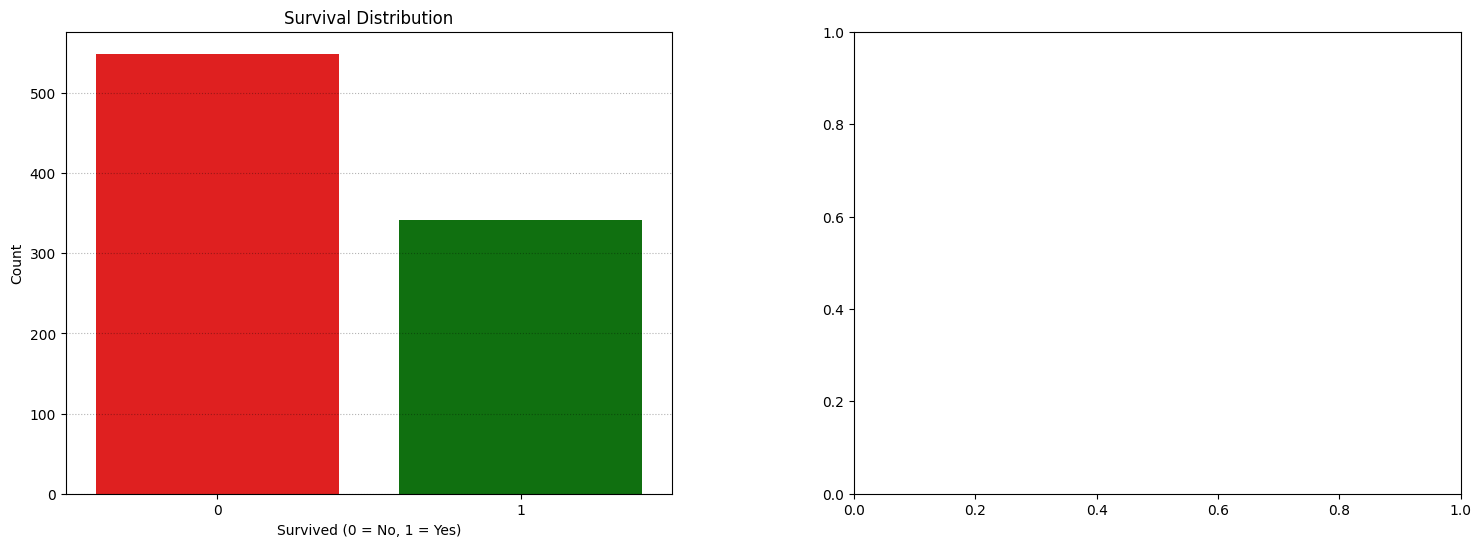

In [124]:
# Creating plot structure
fig = plt.figure(figsize=(18,6))
spec = fig.add_gridspec(1,2)
spec.update(wspace=0.3,hspace=0.15)
sec_1 = fig.add_subplot(spec[0,0])

sns.countplot(x='Survived', data=data, palette=['red', 'green'],ax = sec_1)
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.title('Survival Distribution')
plt.grid(axis='y', linestyle=':', color='black', alpha=0.3)  # Adding grid lines
plt.xticks(rotation=0)  # Rotate x-axis labels (not necessary for binary labels)

sec_2 = fig.add_subplot(spec[0,1])

plt.show()